<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


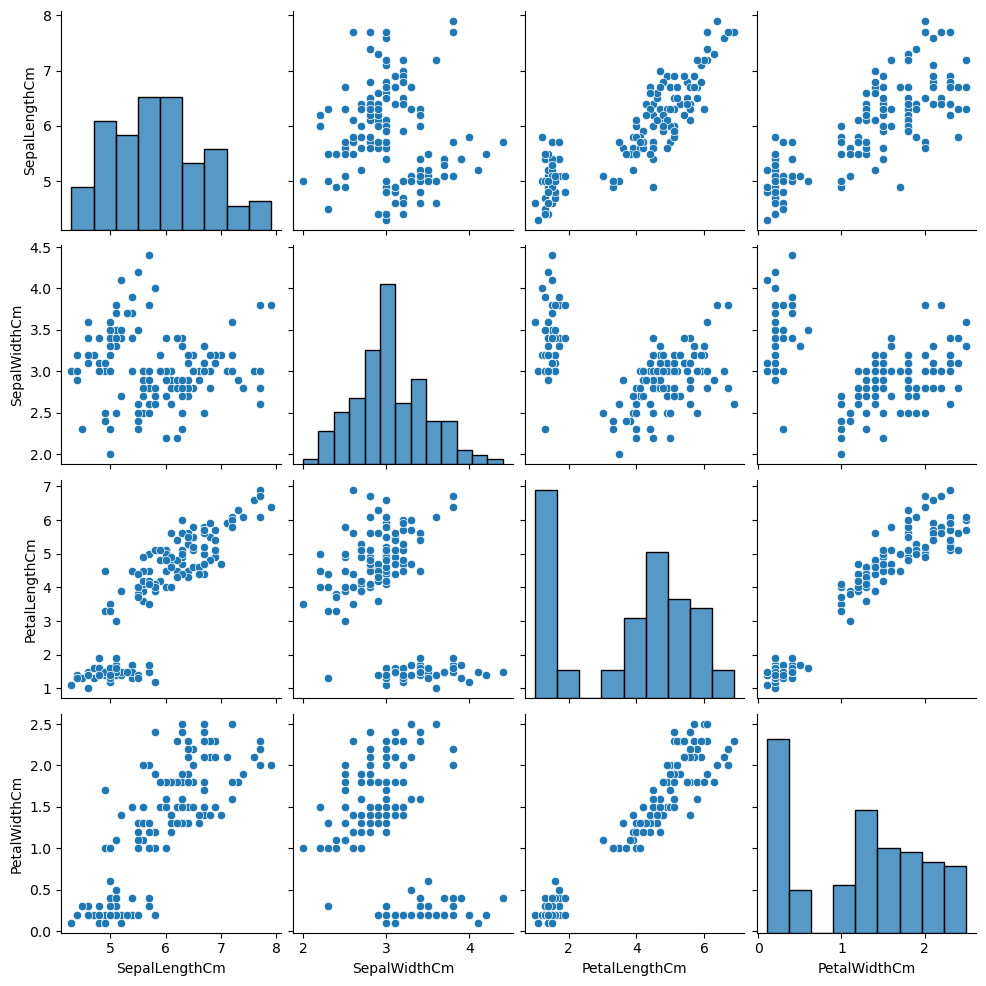

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Iris_data = pd.read_csv('C:\\Users\\16478\\Downloads\\Iris.csv')
Iris_data.head(10)
Iris_data.info()
Iris_data.describe()
Iris_data.Species.value_counts()

sns.pairplot(Iris_data.drop(['Id'],axis=1))
plt.show()


[]

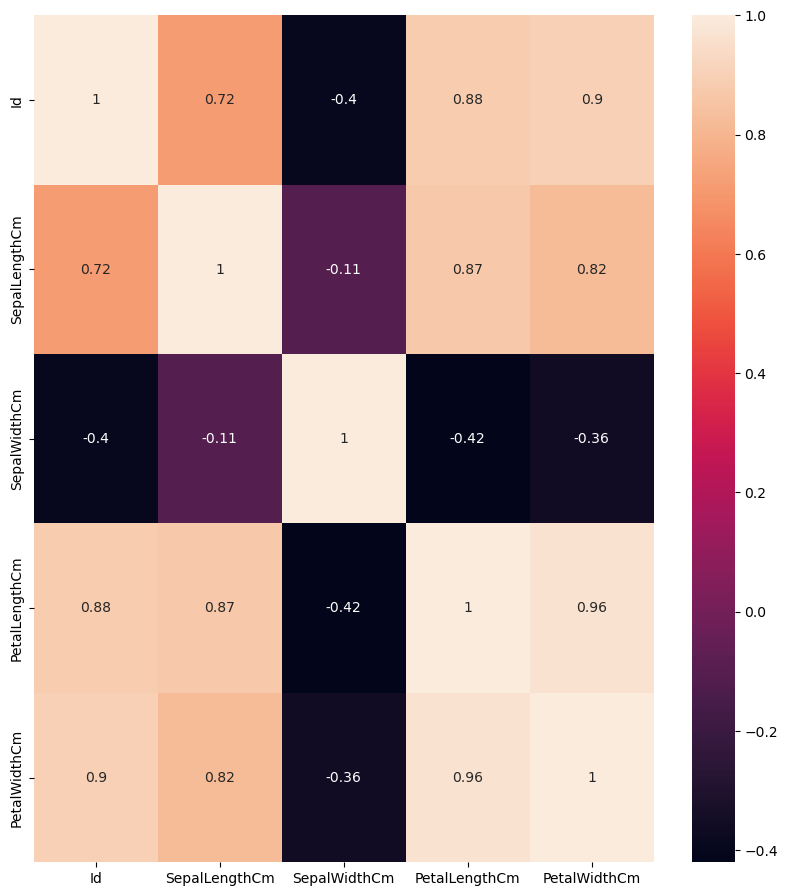

In [21]:
plt.figure(figsize=(10,11))
sns.heatmap(Iris_data.corr(),annot=True)
plt.plot()

In [22]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(Iris_data,test_size=0.3)

train_X=train[['SepalLengthCm',"SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
train_y=train.Species

test_X=test[['SepalLengthCm',"SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
test_y=test.Species

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=12)
model = DT.fit(train_X, train_y)
DT.predict(test_X)

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], dtype=object)

Confusion Matrix:
[[16  0  0]
 [ 0 18  0]
 [ 0  1 10]]
Accuracy Score: 0.9777777777777777
f1 Score: 0.9775489775489775


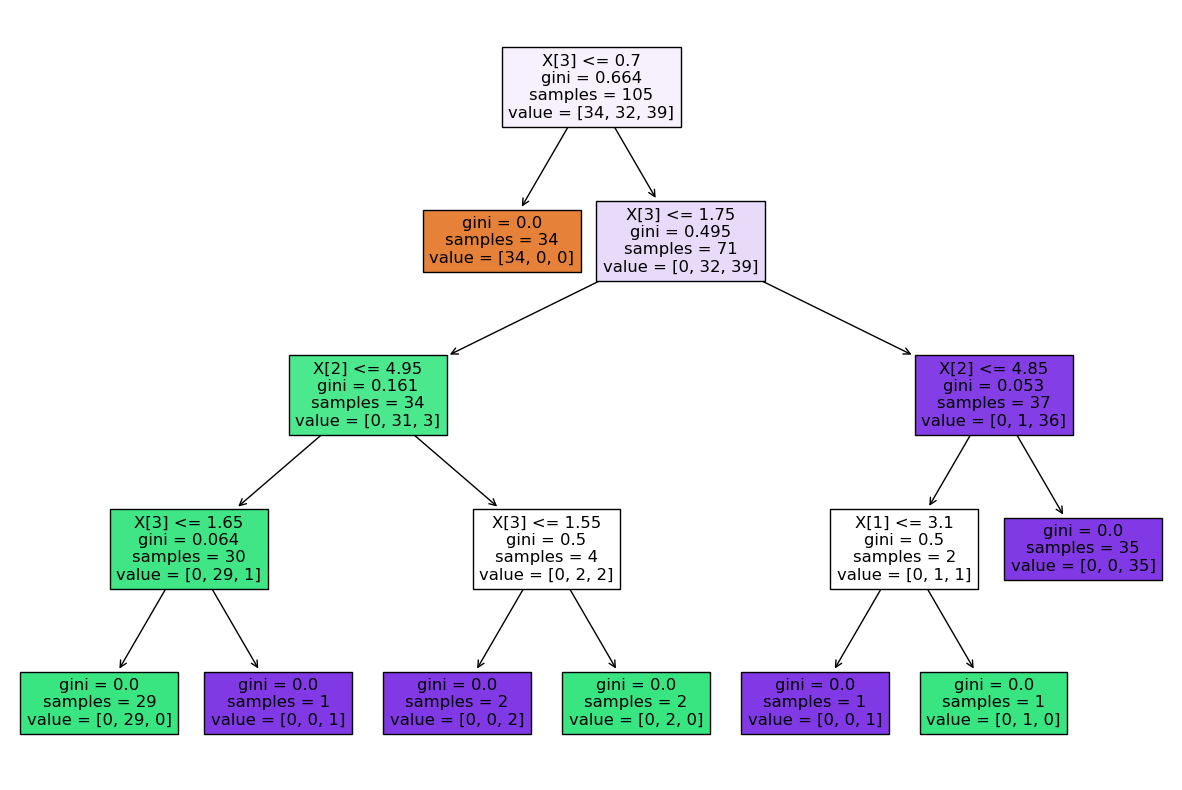

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
y_pred = DT.predict(test_X)

# Calculate the confusion matrix
confusion = confusion_matrix(test_y, y_pred)

print("Confusion Matrix:")
print(confusion)


#Accuracy
from sklearn import metrics
from sklearn.metrics import f1_score
print('Accuracy Score:', metrics.accuracy_score(test_y, y_pred))
f1 = f1_score(test_y, y_pred, average='weighted')
print('f1 Score:', f1)

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(DT, filled=True)
plt.show()

** 1.Describe the decision tree classifier algorithm and how it works to make predictions.**

A supervised machine learning approach used for both regression and classification tasks is called a decision tree 
classifier. Because it generates a tree-like structure of decisions for prediction, it is a common choice for 
categorization tasks. 

The decisions made by the decision tree algorithm are as follows:

**Data Preparation:** We require labelled data that has predetermined results (classes or labels). Every example should
include several features that are combined to provide predictions.

**Choosing a Splitting Criterion:** Recursively splitting the data into subsets according to the values of input features
is how decision trees operate. In order to accomplish this, we must select a splitting criterion that will help us identify the ideal feature and value to divide the data at each node. Common splitting criteria include:

1. Gini Impurity: Calculates the likelihood that an element selected at random will be incorrectly categorized if the node's label distribution is used for classification.
2. Entropy: Indicates how cluttered or unclean a node is. On information theory, it is based.
3. Information Gain: Quantifies the decrease in impurity or entropy brought forth by a split. The best split is chosen using it.

**Building the Tree:** The whole dataset is started at the root node of the decision tree construction procedure. Based on the selected splitting criterion, the algorithm determines which feature and value to use to split the data. 

**Making Predictions:** Using the values of the input characteristics as a guide, we follow the decision branches at the base of the tree to create predictions, starting at the root node. This traversal is continued until the expected class label is contained in a leaf node. For classification tasks, the projected label is often selected based on the majority class of that leaf node.

**Handling Missing Values:** When a feature is absent, they have methods to deal with it, including giving each branch a likelihood of being reached.

**Evaluation:** Various metrics, such as accuracy, precision, recall, F1-score, and area under the ROC curve, can be used, depending on the problem and dataset, to assess the decision tree classifier's performance.

---------------------------------------------------------------------------------------------------------------------------

**2. Provide a step-by-step explanation of the mathematical intuition behind decision tree classification**

The following is a step-by-step breakdown of the mathematical intuition underlying decision tree classification:
**Entropy and Information Gain:** The ideas of entropy and information gain serve as the foundation for decision tree categorization. A dataset's entropy can be used to quantify disorder or impurity. The entropy of a dataset S with regard to class labels for a binary classification issue can be computed mathematically as follows:
 H(S) = -p+ * log2(p+) - p- * log2(p-) 
where the dataset's entropy is represented by H(S).
The percentage of positive (class 1) instances in S is denoted by p+.
The fraction of negative (class 0) occurrences in S is denoted by p-.	
H(S) is the entropy of the dataset.
p+ is the proportion of positive (class 1) instances in S.
p- is the proportion of negative (class 0) instances in S.

**Choosing a Splitting Criterion:**
Recursively dividing the dataset according to the values of the input features is how decision trees operate. The information gain, a measurement of the entropy reduction attained by the split, is computed by the method in order to identify the optimal feature and value for a split. The information gained is computed as the difference between the weighted average of the entropies of the child nodes formed by the split and the entropy of the parent node (H(S))

**Information Gain Calculation:**
For a node N, the information gain (IG) of splitting the data based on feature F and split point S is calculated as:
IG(N, F, S) = H(N) - Σ (|N_i| / |N|) * H(N_i) 
Where:
•	IG(N, F, S) is the information gain.
•	H(N) is the entropy of the parent node N.
•	N_i represents each child node created by the split.
•	|N_i| is the number of data points in the i-th child node.
•	H(N_i) is the entropy of the i-th child node.

**Building the Tree:** The whole dataset is started at the root node of the decision tree construction procedure. Based on the selected splitting criterion, the algorithm determines which feature and value to use to split the data. 

**Making Predictions:**
Decision branches based on the feature values of the data point are followed as we navigate the tree from the root node to a leaf node in order to create a forecast. In binary classification issues, it is common practice to select the majority class in the leaf node as the projected label.

**Handling Missing Values:** When a feature is absent, they have methods to deal with it, including giving each branch a likelihood of being reached.

**Evaluation:** Various metrics, such as accuracy, precision, recall, F1-score, and area under the ROC curve, can be used, depending on the problem and dataset, to assess the decision tree classifier's performance.

---------------------------------------------------------------------------------------------------------------------------

**3. Explain how a decision tree classifier can be used to solve a binary classification problem.**
To classify data points into one of two potential classes or categories is the aim of a binary classification problem, which can be solved with a decision tree classifier. To solve such an issue, a decision tree classifier can be used as follows:
**Data Preparation:**
Begin with a dataset of labelled instances, where each example has a binary class label and numerous characteristics. 

**Building the Decision Tree:**
The whole dataset is placed at the tree's root node to start the decision tree construction process.
Selecting a Splitting Criterion:
Select a splitting criterion, which quantifies the degree to which a feature and split point can separate the data into more uniformly labelled groups. Common splitting criteria include Gini Impurity, Entropy, or Information Gain. The algorithm evaluates each feature and possible split point to select the one that maximizes the chosen criterion.

**Splitting the Data:**
At the current node of the tree, the dataset is split into two or more subsets (child nodes) based on the selected splitting criterion. Based on the feature value at the node, each subset represents a distinct branch.

**Recursive Partitioning:**
The process of creating a tree is recursive, which means that the same procedures are applied to each child node. For every child node, the algorithm will determine the optimal feature and split point, resulting in the creation of new branches.

**Stopping Criteria:**
Until one of the stopping conditions is satisfied, keep building the tree. 
Typical endpoint criteria consist of the following:
A node's data points are all members of the same class, or pure node.
The depth of the tree reaches a predetermined maximum.
a node's designated number of data points.

**Making Predictions:**
Decision branches based on the feature values of the data point are followed as we navigate the tree from the root node to a leaf node in order to create a forecast. In binary classification issues, it is common practice to select the majority class in the leaf node as the projected label.
Evaluation: Various metrics, such as accuracy, precision, recall, F1-score, and area under the ROC curve, can be used, depending on the problem and dataset, to assess the decision tree classifier's performance.

---------------------------------------------------------------------------------------------------------------------------

**4. Discuss the geometric intuition behind decision tree classification and how it can be used to make predictions**

The geometric intuition behind decision tree classification involves the idea of creating a set of decision boundaries in the feature space. These decision boundaries serve as the means to separate data points belonging to different classes or categories. The nature of these boundaries, whether they are lines, planes, or hyperplanes, depends on the dimensionality of the feature space. 

**Feature Space:** In a binary classification problem, we have a feature space with two dimensions or more, where each dimension corresponds to a feature in our dataset. The feature space represents all possible combinations of feature values. 

**Binary splitting:** The algorithm chooses one feature and a certain threshold value for that feature at each node in the decision tree. By making this choice, the feature space is split into two areas or sides, or a binary split.

**Decision Boundaries:** In the feature space, a decision boundary is produced by the binary split. This boundary can be shown as a plane in three dimensions, a line in two dimensions, or a hyperplane in higher dimensions. Data points are classified into distinct classes at this border. A class is represented by one side of the boundary, and a different class is represented by the other.

**Recursive Partitioning:** Every decision tree node experiences a recursive cycle of binary splitting and decision boundary creation. Decision boundaries in the feature space are arranged hierarchically as a result of additional splits and boundaries formed as one descends the tree.

**Making Predictions:** We utilize the feature space to position new data points based on their feature values in order to create predictions. Comparing these feature values to the splitting criterion at each node allows us to further follow the decision tree's branches. We ultimately come to a leaf node after moving through the tree. For the new data point, the predicted class label is the one that corresponds to the majority of training samples in that leaf node.

**Interpreting Decision Boundaries:**
The decision tree classifier divides data points into distinct classes, and we may comprehend this process by using our geometric intuition. We can see how the model uses feature values to make decisions by displaying the decision boundaries. Decision trees have a big benefit in this interpretability.


---------------------------------------------------------------------------------------------------------------------------

**5. Define the confusion matrix and describe how it can be used to evaluate the performance of a classification model.**

A confusion matrix is a table that is used to evaluate the performance of a classification model, especially in binary classification tasks. It provides a comprehensive summary of the model's predictions and how they align with the actual class labels in the dataset. The confusion matrix consists of four main components:
1. True Positives (TP): The number of instances that the model correctly predicted as positive 
2. True Negatives (TN): The number of instances that the model correctly predicted as negative 
3. False Positives (FP): The number of instances that the model incorrectly predicted as positive when they are actually negative. This is also known as a Type I error.
4. False Negatives (FN): The number of instances that the model incorrectly predicted as negative when they are actually positive. This is also known as a Type II error.

Confusion matrix helps to evaluate the performance of a classification model. Some of the performance metrics which can be evaluated are
1.	Accuracy: Accuracy measures the overall correctness of the model's predictions. It is calculated as (TP + TN) / (TP + TN + FP + FN). A higher accuracy indicates better performance, but it may not be the best metric for imbalanced datasets.
2.	Precision: Precision measures the proportion of true positive predictions among all positive predictions made by the model. It is calculated as TP / (TP + FP). Precision is important when minimizing false positives is crucial.
3.	F1-Score: The F1-Score is the harmonic mean of precision and recall and is useful when there is a trade-off between precision and recall. It is calculated as 2 * (Precision * Recall) / (Precision + Recall).
4.	Balanced Accuracy: Balanced accuracy takes into account the balance between the positive and negative classes in an imbalanced dataset. It is calculated as (Sensitivity + Specificity) / 2.

--------------------------------------------------------------------------------------------------------------------------

**6. Provide an example of a confusion matrix and explain how precision, recall, and F1 score can be calculated from it.**

Consider the following confusion matrix: 

                Predicted Positive (P)   	Predicted Negative (N)
 Actual Positive (P)        90	                    10
 Actual Negative (N)     	20                     	80

1. Precision (P):
Precision measures the accuracy of the model's positive predictions. 
Precision = TP / (TP + FP) = 90 / (90 + 20) = 0.8181 
2. Recall (R):
Recall, also known as Sensitivity or True Positive Rate, measures the model's ability to identify all the actual positives. 
Recall = TP / (TP + FN) = 90 / (90 + 10) = 0.9000.
3. F1 Score:
The F1 score is the harmonic mean of precision and recall, which helps balance the trade-off between the two. It provides a single metric that considers both precision and recall.
F1 Score = 2 * (Precision * Recall) / (Precision + Recall) = 2 * (0.8181 * 0.9000) / (0.8181 + 0.9000) = 0.8571

The example model achieved a precision of approximately 0.8181, which means that around 81.81% of the positive predictions were correct. 
The recall is approximately 0.9000, indicating that the model correctly identified about 90% of the actual positive instances. The F1 score is approximately 0.8571, providing a balance between precision and recall. 

---------------------------------------------------------------------------------------------------------------------------

**7. Discuss the importance of choosing an appropriate evaluation metric for a classification problem and explain how this can be done**


For a classification problem, selecting the right evaluation measure is essential since it dictates how we evaluate our model's performance and if it satisfies the particular objectives and specifications of the assignment. The type of challenge and the relative significance of various components of the model's performance can influence the choice of metric. To choose the appropriate assessment metric, take into account the following factors:
Understand the Problem and Objectives:
Understand the problem we are attempting to address as well as the particular objectives and specifications of our categorization work before we start. Think about how accurate and inaccurate forecasts could affect our daily life.

**Class Imbalance:**
Find out if there is a class imbalance in our dataset, which occurs when one class considerably outnumbers the other. The area under the ROC curve (AUC), precision, recall, F1 score, and other measures that take unbalanced data into account should be taken into consideration instead of accuracy in some situations.

**Trade-offs between Metrics:** Recognize the compromises between various assessment metrics. For instance, there is frequently an inverse relationship between recall and precision; that is, increasing recall may cause a loss in precision. This compromise is offset by the F1 score.

**Impact of False Positives and False Negatives:** Real-World Effects of False Positives and False Negatives: Take into account the effects of false positives and false negatives. False positives or false negatives may cost more in some applications than they do in others.

**Receiver Operating Characteristic (ROC) Analysis:** The AUC and ROC analysis are useful tools to use when assessing a model's performance over a variety of threshold values for binary classification. The trade-off between true positive rate (recall) and false positive rate at various thresholds is displayed using ROC curves.

**Domain Knowledge:** Stakeholders and domain specialists with in-depth knowledge of the issue should be consulted. They can offer insightful information about the significance of various error kinds and assist we in selecting the most appropriate metric.

**Use Multiple Metrics:** To obtain a thorough understanding of our model's performance, it is frequently a good idea to employ a variety of evaluation metrics. For instance, accuracy can be used as a general metric and precision, recall, and F1 score to evaluate performance in a particular class. 

**Customized metrics:** Depending on the specifics of our issue, we might need to create bespoke assessment measures. When pre-made measurements fail to adequately portray the subtleties of our work, custom metrics may be helpful.

**Cross-validation:** Make sure to use cross-validation to evaluate the model's performance across several subsets of our data when employing evaluation metrics. By doing this, the influence of dataset variability is lessened and a more thorough evaluation is guaranteed.

**Monitoring Metrics Over Time:** After a model is deployed, keep an eye on its effectiveness by utilizing the assessment metrics that we have selected. This enables we to identify and correct any model performance loss brought on by shifting data distributions or other causes.

--------------------------------------------------------------------------------------------------------------------------

**8. Provide an example of a classification problem where precision is the most important metric, and explain why.**

The context of email spam detection is one example of a classification problem where precision is the most crucial criterion.

**Example of Email Spam Detection:**
The aim of email spam detection is to categorize incoming emails as "non-spam" (ham) or "spam". Misclassifying an email can have a wide range of repercussions. Here, accuracy is an important statistic to take into account because:

**Resulting from False Positives:** The term "false positives" refers to the misclassification of a valid email as spam. Serious repercussions may result from this, such as missing crucial emails for work or personal correspondence.
The ratio of real positive forecasts to all positive predictions is known as precision. When the model classifies an email as spam in this case, high precision indicates that it is very likely to be spam and not a false positive.

**User Experience and Trust:** In order to keep spam out of their inboxes, users frequently rely on email classification algorithms. Users may become irate and lose faith in the efficacy of the system if a spam filter consistently returns false positives, or valid emails that are mistakenly classified as spam.
High accuracy guarantees that users are less likely to experience the annoyance of having crucial emails mistakenly categorized as spam.

**Regulatory Compliance:** Accurate delivery of specific email types may be necessary for regulatory compliance in some businesses or industries. If these communications are mistakenly marked as spam, there may be problems with compliance or the law.
High precision lowers the possibility of mistakenly classifying important emails as spam, which helps to maintain compliance.

**Operational Efficiency:** One way to increase operational efficiency is by lowering false positives. Users lose time and become less productive when they have to manually search their spam bins for crucial emails that they may have missed.
High precision reduces the need for human interaction, which makes email management procedures go more smoothly.
Precision is an important parameter in this email spam detection scenario because it tackles the ramifications of misclassifying valid emails as spam (false positives). Elevated accuracy translates into a decreased probability of these mistakes, which is crucial to preserving user confidence in the spam filter as well as operational effectiveness and compliance across a range of sectors.

---------------------------------------------------------------------------------------------------------------------------
**9. Provide an example of a classification problem where recall is the most important metric and explain why.**

An example of a classification problem where recall is the most important metric is in the context of medical diagnosis for a life-threatening disease, such as cancer.

**Medical Diagnosis (Cancer Detection) Example:**
When it comes to cancer detection, the main objective is to find those who have the disease when it's still in its early stages, even if this results in some false positives. Recall (also known as sensitivity or true positive rate) becomes the most crucial parameter in this case for a number of reasons:

**Early Disease Detection:**
For effective treatment and better patient outcomes, medical diagnosis relies on the early detection of diseases like cancer. Early cancer detection improves the likelihood of effective treatment and recovery.
A high recall rate lowers the possibility of overlooking cancer patients by ensuring a higher percentage of true positive cases—that is, individuals with the disease—are appropriately identified.

**Minimizing False Negatives:**
In this example, false negatives are people who have cancer but are mistakenly diagnosed as not having the illness. Neglecting to diagnose cancer can have serious repercussions, such as treatment delays, worsening of the illness, and lower survival rates.
The goal of high recall is to reduce false negatives, which lowers the possibility of misdiagnosing patients with cancer.

**Balancing False Positives:**
Although reducing false negatives is the top priority for good recall, this may result in more false positives than false negatives. False alarms may cause some non-cancer patients to undergo additional tests or treatment.
Even though there may be some false positives in this situation, the goal is to find all possible cases, and additional confirmatory testing can be utilized to authenticate the results
